# WSI LAB 04 - Tworzenie drzew decyzyjnych algorytmem ID3

Zaimplementowałem algorytm ID3 tworzący drzewa decyzyjne. Przetestowałem jego działanie, trenując go na danych pacjentów badanych pod kątem wystąpienia chorób układu krwionośnego. Zbadałem wpływ maksymalnej wysokości drzewa na efektywność algortmu.

W tym celu stworzyłem klasę MySolver implementującą otrzymany interfejs Solver. Przy tworzeniu obiektu MySolver podaje się maksymalną wysokość drzewa decyzyjnego. Metoda `fit()` przyjmuje dataset w postaci X (lista krotek zawierających parametry wejściowe ze zbioru uczącego) oraz y (lista klas zbioru uczącego). Metoda `predict()` jako argument przyjmuje X (lista krotek zawierających parametry wejściowe ze zbioru testowego).

Oprócz tego stworzyłem klasę Node, przedstawiającą węzeł decyzyjny lub liść w drzewie. Zawiera ona pola:
- dla węzła decyzyjnego:
    - feature_index - indeks parametru, od którego zależy rozgałęzienie w danym węźle
    - threshold - wartość graniczna powyższego parametru
    - left, right - referencje na lewe i prawe dziecko węzła
    - inf_gain - information gain w danym węźle
- dla liścia:
    - value - najczęściej występująca klasa w pozostałym datasecie

Zaimplementowałem również funkcje:
- `read_from_csv()` do czytania datasetu z pliku csv i podzielenia go na X i y
- `format_data()` do zdyskretyzowania parametrów. W eksperymentach zaokrągliłem wartości age do najbliższej podzielnej przez 100, a height i weight do najbliższych podzielnych przez 5. Uważam, że pozostałe parametry nie wymagały dyskretyzacji.

## Porównanie maksymalnych wysokości drzew

W tym eksperymencie porównuję skuteczność drzew utworzonych przez algorytm ID3 z różnymi wartościami parametru max_depth. W tym celu skorzystałem z funkcji `sklearn.model_selection.train_test_split` do podzielenia datasetu na pary uczące i pary testujące. Wykonałem 2 eksperymenty:
1. Trenuję model na 80% par z cardio_train.csv i testuję go na pozostałych 20%.
2. Trenuję model na 50% par z cardio_train.csv i testuję go na pozostałych 50%.

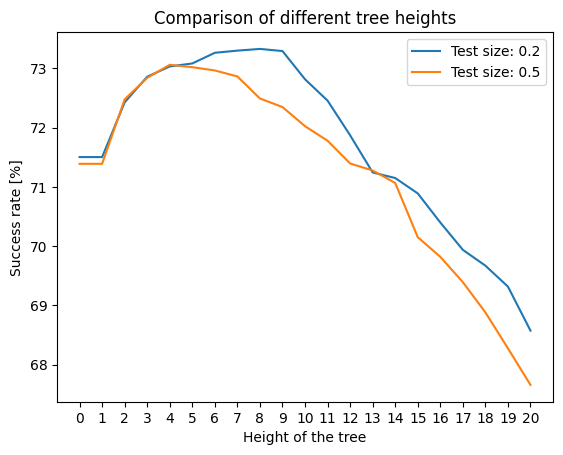

In [1]:
from report_utils import compare_depths
compare_depths(list(range(21)), [0.2, 0.5])

Na powyższym wykresie widoczne są wyniki eksperymentu. Na osi x jest wysokość drzewa decyzyjnego a na osi y - skuteczność funkcji `predict()` wyrażona w %. W obu przypadkach skuteczności dla bardzo niskich drzew wachały się w okolicy 71%, następnie skuteczność rosła, aż do osiągnięcia maksimum (ok. 73%) a potem malała. Dla modelu uczącego się na 80% datasetu maksymalna skuteczność wystąpiła dla drzewa o wysokości 8, a dla modelu uczącego się na 50% datasetu - najlepiej sprawdziło się drzewo o wysokości 4. Dla drzew o wysokościach wyższych niż te - dochodziło do overfitting - czyli model jest idealnie dopasowane do danych, na których się uczył, lecz nie radzi sobie z danymi, których jeszcze nie widział.

## Porównanie działania funkcji `predict()` na danych używanych w uczeniu i innych danych

W tym eksperymencie zrobię drzewa decyzyjne o wysokościach z przedziału <0, 20>, a następnie przebadam ich skuteczność na danych uczących i danych testujących (takich których model nie używał do uczenia).

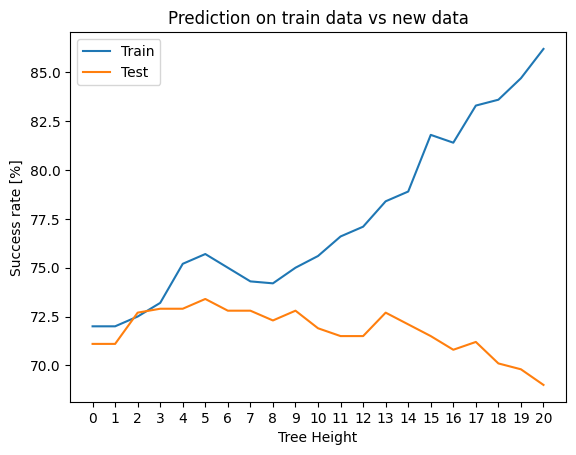

In [1]:
from report_utils import plot_train_test
plot_train_test()

Na powyższym wykresie jedna linia przedstawia skuteczność drzew na danych które już widziały. Wraz ze wzrostem wysokości drzewa rośnie skuteczność klasyfikacji tych danych.

Druga linia przestawia skuteczność na nowych danych. Jak już wiadomo z poprzedniego eksperymentu, skuteczność rośnie wraz z rozmiarem drzewa do pewnego momentu, a następnie zaczyna stopniowo maleć przez overfitting.

## Co zrobić, jeżeli w danych pojawi się wartość, której nie było w zbiorze trenującym?

Wydaje mi się, że to nie będzie problemem dla algorytmu, gdyż operuje on na takiej zasadzie, że w każdym rozgałęzieniu dzieli dziedzine danego parametru na 2 (>= niż threshold lub < niż threshold). Nie ważne jaka wartość się pojawi - na pewno trafi ona do jednej z tych kategorii.

## Brakujące wartości?

W przypadku wywoływania funkcji `predict()` dla niepełnego zestawu danych (niektóre są None), w mojej implementacji funkcja zwróci błąd. Żeby temu zapobiec, możnaby sprawdzać czy dana wartość dla feature, od którego zależy rozgałęzienie - jest None i jeśli jest, to z prawdopodobieństwem 50% spełnia warunek lub go nie spełnia.

## Wnioski końcowe

1. Drzewa decyzyjne utworzone algorytmem ID3 są dobrym i szybkim sposobem na rozwiązanie problemu klasyfikacji. Po dosyć czasochłonnym trenowaniu modelu (czas zależny od maksymalnej wysokości drzewa i ilości danych), przypisanie klasy dla pojedynczego zestawu parametrów wejściowych jest bardzo szybkie. Algorytm jest uniwersalny i można go zastosować dla każdego problemu klasyfikacji (binarnej), pod warunkiem, że otrzyma pary uczące z dobrze zdyskretyzowanymi parametrami. 
W przypadku rozpoznawania chorób układu krwionośnego, algorytm ten pozwala na osiągnięcie skuteczności ok. 75%. Wydaje mi się, że gdyby dataset używany w algorytmie był mniej złożony (zawierał mniej feature'ów) - możliwe byłoby osiągnięcie jeszcze większego procentu sukcesu.

2. Myślę, że optymalna wysokość drzewa jest w dużej mierze zależna od złożoności datasetu konkretnego problemu oraz ilości par uczących. W tym przypadku optymalna wysokość drzewa wachała się w granicach 4 do 8. Dla mniejszych wysokości, algorytm oczywiście nie radzi sobie za dobrze, ponieważ bierze pod uwagę za mało parametrów wejściowych (struktura drzewa jest zbyt prosta). Natomiast dla wysokości przekraczających wartość optymalną, dochodzi do overfitting'u - algorytm zbyt mocno analizuje pary uczące, przez co w znacznym stopniu się do nich "przyzwyczaja" i w przypadku klasyfikacji zbiorów parametrów, do których nie jest przyzwyczajony - optymalność jest zdecydowanie niższa.